In [1]:
import numpy as np
import os

# Imports nécessaires pour construire un modèle LeNet 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Rescaling

# Pour importer le datasets
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


# Pour la compilation du modèle
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Pour visualiser les performances
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

print(tf.__version__)
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
tf.keras.backend.clear_session()
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


# Chargement du dataset
#dir_name = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample"
dir_name = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample_balanced"
img_size = (224, 224)  # Taille cible
batch_size = 32
class_names = sorted(os.listdir(dir_name))
nb_class = len(class_names)

train_ds = image_dataset_from_directory(
    dir_name,
    image_size=img_size,
    batch_size=batch_size,
    subset="training",
    validation_split=0.2,
    seed=42
)

val_ds = image_dataset_from_directory(
    dir_name,
    image_size=img_size,
    batch_size=batch_size,
    subset="validation",
    validation_split=0.2,
    seed=42
)

# Ajout d'optimisation : mise en cache et préchargement
#train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

def display_results(model_history, model_name):
    # Récupérer les données d'entraînement et de validation
    train_loss = model_history.history["loss"]
    val_loss = model_history.history["val_loss"]
    train_accuracy =  model_history.history["accuracy"]
    val_accuracy = model_history.history["val_accuracy"]
    
    plt.figure(figsize=(20, 8))
    
    # Tracer la perte
    plt.subplot(121)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title(model_name + ": Perte d'entraînement et de validation")
    plt.ylabel('Perte ')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    # Tracer l'erreur absolue moyenne (MAE)
    plt.subplot(122)
    plt.plot(train_accuracy)
    plt.plot(val_accuracy)
    plt.title(model_name+': Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    plt.show()

2025-05-08 09:13:51.529667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746688431.706605    1837 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746688431.757866    1837 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746688432.152206    1837 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746688432.152274    1837 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746688432.152275    1837 computation_placer.cc:177] computation placer alr

2.19.0
Num GPUs Available:  1
Found 54000 files belonging to 27 classes.
Using 43200 files for training.


I0000 00:00:1746688465.371982    1837 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 54000 files belonging to 27 classes.
Using 10800 files for validation.


## Entrainement du modèle

Epoch 1/30
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 256s 188ms/step - accuracy: 0.0367 - loss: 3.3642 - val_accuracy: 0.0336 - val_loss: 3.2959 - learning_rate: 1.0000e-04
Epoch 2/30
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 255s 189ms/step - accuracy: 0.0374 - loss: 3.2959 - val_accuracy: 0.0358 - val_loss: 3.2960 - learning_rate: 1.0000e-04
Epoch 3/30
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 253s 187ms/step - accuracy: 0.0382 - loss: 3.2959 - val_accuracy: 0.0362 - val_loss: 3.2960 - learning_rate: 1.0000e-04
Epoch 4/30
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 253s 188ms/step - accuracy: 0.0349 - loss: 3.2959 - val_accuracy: 0.0346 - val_loss: 3.2961 - learning_rate: 1.0000e-04
Epoch 5/30
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 252s 187ms/step - accuracy: 0.0371 - loss: 3.2958 - val_accuracy: 0.0346 - val_loss: 3.2961 - learning_rate: 5.0000e-05
Epoch 6/30
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 254s 188ms/step - accuracy: 0.0380 - loss: 3.2958 - val_accuracy: 0.0346 - val_loss: 3.2961 - learning_rate: 5.0000e-05
Epoch 7/30
1350/1350 ━━━━━━━

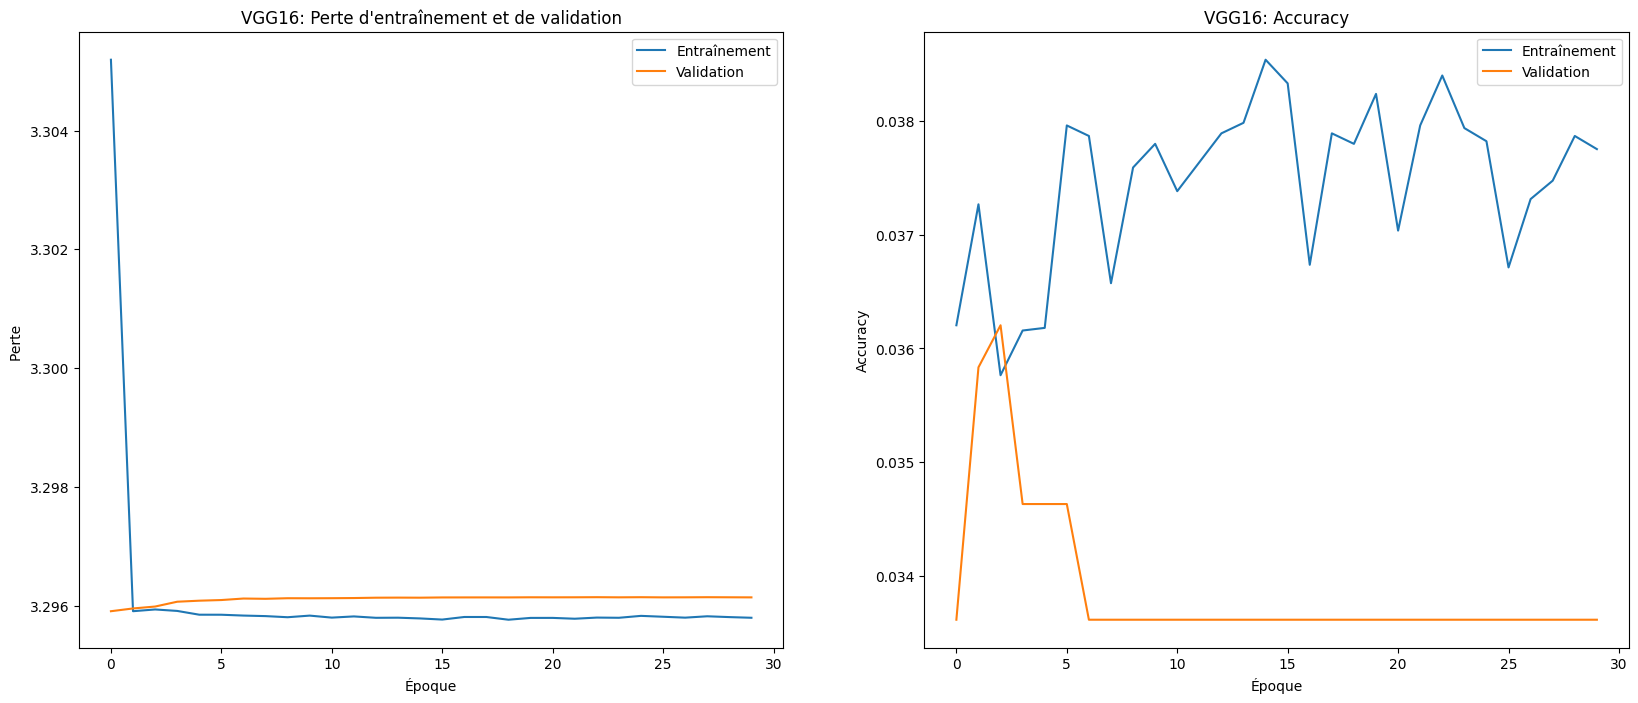

In [4]:
import tensorflow as tf 

base_model = tf.keras.applications.VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
#base_model.trainable = False  # Geler d'abord le modèle de base

# Dégeler les dernières couches du modèle de base
base_model.trainable = False
# Dégeler le 5ème bloc de convolution
for layer in base_model.layers:
    if "block5_" in layer.name:
        layer.trainable = True
    elif "block4_" in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

model = tf.keras.Sequential([
    # Augmentation de données
    data_augmentation,

     # Prétraitement spécifique au modèle
    tf.keras.layers.Lambda(lambda x: tf.keras.applications.vgg16.preprocess_input(x)),

    # Modèle de base
    base_model,

    # Couches de classification
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(nb_class, activation='softmax')
])


model.compile(
    loss='sparse_categorical_crossentropy',  
    optimizer= tf.keras.optimizers.Adam(learning_rate=1e-4),                 
    metrics=['accuracy'])  


model_history = model.fit(train_ds,           
                        validation_data=val_ds,
                        epochs=30,
                        callbacks=[
                        #tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True),
                        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
                    ])

# Analyse de l'entainement
print("Analyse entraintement")
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Précision de validation finale: {val_accuracy:.4f}")
display_results(model_history, "VGG16")